In [1]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from pypushdeer import PushDeer
import numpy as np

import logging
LOG_FORMAT = "%(asctime)s [%(levelname)s] %(message)s"
DATE_FORMAT = "%Y-%m-%d %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=LOG_FORMAT, datefmt=DATE_FORMAT)

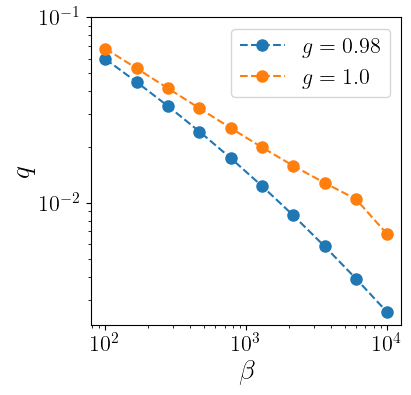

In [6]:
prefixPath = "../../Data/results/6/a1"

label = ['$q$', '$Q$', '$\hat{q}$', '$\hat{Q}$', '$r$', '$R$', "$\hat{r}$", '$\hat{R}$']
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

gList = [0.98, 1.00]
gamma = 0.0
eta = 0.0
nonLinearity = 'tanh'

for i in range(1):
    for j, g in enumerate(gList):
        record = torch.load(prefixPath + f"/beta-g{g:.2f}-gamma{gamma:.1f}-bi100-bf10000-eta{eta:.1f}-{nonLinearity}.pt")
        betaList = record["beta"][:record["currentIndex"]+1]
        minusBetaFList = record["minusBetaF"]
        energyList = record["energy"]
        L2NormList = record["L2Norm"]
        QList = record["Qs"]
        entropyList = minusBetaFList + betaList * energyList

        ax.plot(betaList, QList[i], "o--", markersize=8,  label="$g={}$".format(g))
        ax.tick_params(labelsize=16)
        ax.set_xlabel("$\\beta$", fontsize=20)
        ax.set_ylabel("$q$", fontsize=20)
        ax.legend(loc=0, fontsize=16)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_yticks([1e-2, 1e-1])

# plt.savefig(f"../../Data/figures/fig8-q.pdf", bbox_inches="tight")
plt.show()
plt.close()